In [1]:
#import all the necessary libraries
from tensorflow import keras #library for neural network
import pandas as pd # data processing
import numpy as np  #linear algebra
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline 

In [52]:
#Reading Data 
df=pd.read_csv("IRISH.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [53]:
print('Describing the data', df.describe())
print('Information of the data', df.info())

Describing the data                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthC

In [55]:
print("First 10 sample of the dataset",df.head(10))
print("Last 10 sample of the dataset",df.tail(10))

First 10 sample of the dataset    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
Last 10 sample of the dataset       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.

#### Visualization of the dataset 

The visualizaton of the dataset inorder to understand tha dataset more,here we can see how every species differ from each other.

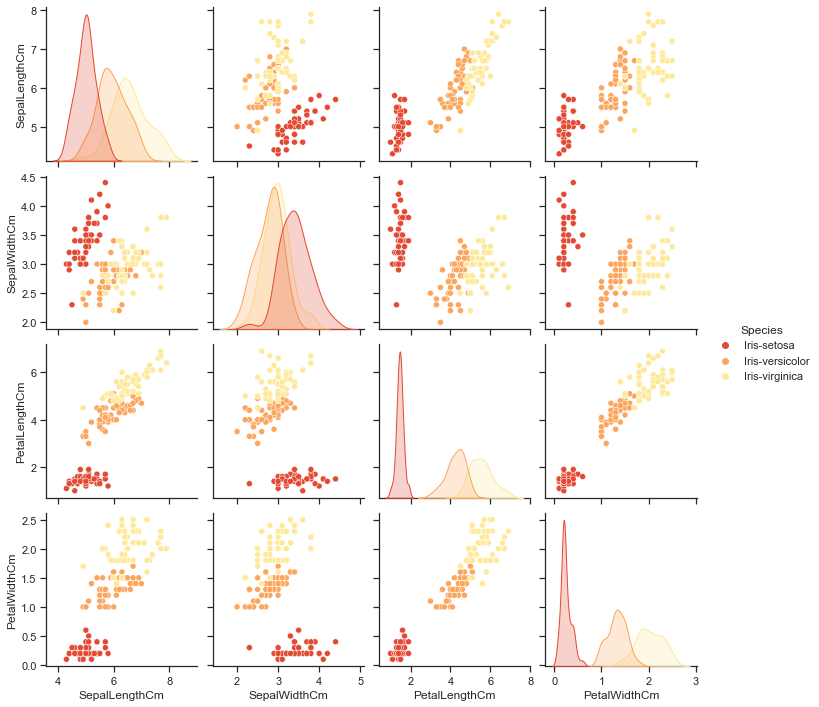

In [56]:
#plotting the pairwasie relationship between diffrent parameters 

import seaborn as sns 
sns.set(style='ticks')
sns.set_palette('RdYlGn')
sns.pairplot(df.iloc[:,1:6],hue="Species")

F:\python_anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\python_anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\python_anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\python_anaconda\lib\site-packages\seabor

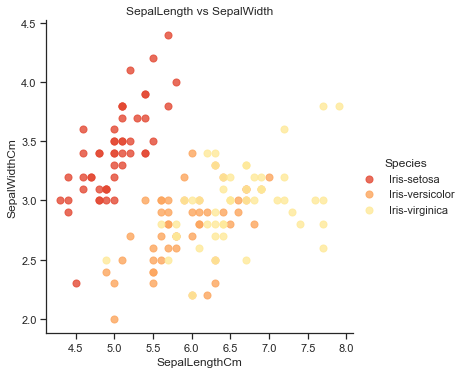

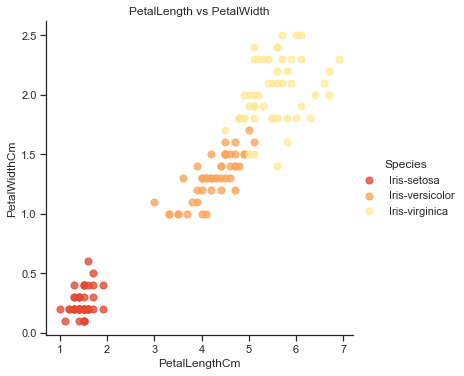

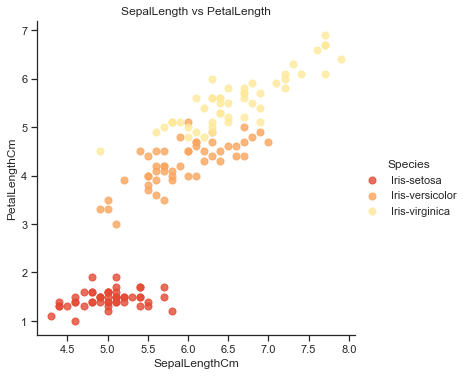

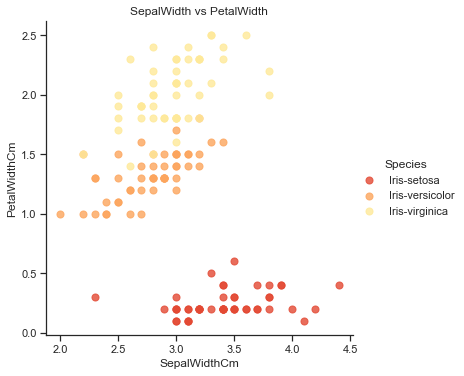

In [57]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [61]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [72]:
# splitting the data into training  and test set
X = df.iloc[:,1:5].values
Y = df.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(Y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [73]:
print('X_train is:',X_train.shape)
print('Y_train is:',Y_train.shape)
print('X_test is:',X_test.shape)
print('Y_test is:',Y_test.shape)

X_train is: (120, 4)
Y_train is: (120, 3)
X_test is: (30, 4)
Y_test is: (30, 3)


In [74]:
#Defining the Model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(3,input_dim=4,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 18        
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


#### Keras is one awesome API which makes building Artificial Neural Networks easier. It is quite easy getting used to it.  In this article, we just scratched the surface of this API and in next posts, we will explore how we can implement different types of Neural Networks using this API.
#### Here i created:
#### one input layer with four nodes, because we are having four attributes in our input values,
#### two hidden layers with 3 and 5 neurons respectively,
#### eachone output layer with three neurons, because we are having three output classes
#### In hidden layers, neurons use Rectifier activation function, while in output layer neurons use Softmax activation function (ensuring that output values are in the range of 0 and 1). After that, we compile our model, where we define our cost function and optimizer. In this instance, we will use Adam gradient descent optimization algorithm with a logarithmic cost function (called categorical_crossentropy in Keras).

In [75]:
#check initialized weights 
print(model.get_weights())

[array([[-0.6897513 ,  0.50935173, -0.36544   ],
       [ 0.6804185 ,  0.48284292, -0.8832344 ],
       [ 0.25146043,  0.24639559,  0.41899443],
       [-0.47645223, -0.85647094,  0.23302639]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[-0.519204  ,  0.36472756,  0.84139496,  0.6723607 , -0.71965873],
       [-0.5940165 , -0.1925348 ,  0.43647486, -0.6863419 ,  0.8416566 ],
       [ 0.5728784 ,  0.12961072,  0.8249168 ,  0.4231159 ,  0.5078214 ]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[ 0.5150363 ,  0.5381196 ,  0.46754843],
       [-0.07883644, -0.49802163, -0.7823776 ],
       [-0.3134824 , -0.04848689, -0.6357041 ],
       [-0.43219566, -0.2888487 , -0.01771879],
       [-0.7758746 , -0.7666416 ,  0.13964838]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [81]:
#fitting the  model and predicting 
model.fit(X_train,Y_train,epochs=100,batch_size=10)



Epoch 1/100
12/12 [==============================] - 1s 7ms/step - loss: 0.1215 - accuracy: 0.9667
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1208 - accuracy: 0.9667
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1208 - accuracy: 0.9667
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9667
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9667
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1211 - accuracy: 0.9667
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1200 - accuracy: 0.9667
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1192 - accuracy: 0.9667
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1192 - accuracy: 0.9667
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1201 - accuracy: 0.9667
Epoch 11/

12/12 [==============================] - 0s 6ms/step - loss: 0.1057 - accuracy: 0.9667
Epoch 83/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1064 - accuracy: 0.9667
Epoch 84/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1061 - accuracy: 0.9667
Epoch 85/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1056 - accuracy: 0.9667
Epoch 86/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1052 - accuracy: 0.9667
Epoch 87/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1061 - accuracy: 0.9667
Epoch 88/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1051 - accuracy: 0.9667
Epoch 89/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1050 - accuracy: 0.9667
Epoch 90/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1049 - accuracy: 0.9667
Epoch 91/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1047 - accuracy: 0.9667
Epoch 92/100


In [82]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=10)
history

Epoch 1/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1035 - accuracy: 0.9667
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9667
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1029 - accuracy: 0.9667
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1028 - accuracy: 0.9667
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1023 - accuracy: 0.9667
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1020 - accuracy: 0.9667
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1028 - accuracy: 0.9667
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1016 - accuracy: 0.9667
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1026 - accuracy: 0.9667
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1020 - accuracy: 0.9667
Epoch 11/

12/12 [==============================] - 0s 7ms/step - loss: 0.0929 - accuracy: 0.9667
Epoch 83/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0926 - accuracy: 0.9667
Epoch 84/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0946 - accuracy: 0.9667
Epoch 85/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0920 - accuracy: 0.9667
Epoch 86/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0929 - accuracy: 0.9667
Epoch 87/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0920 - accuracy: 0.9667
Epoch 88/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0925 - accuracy: 0.9667
Epoch 89/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0920 - accuracy: 0.9667
Epoch 90/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0917 - accuracy: 0.9667
Epoch 91/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0916 - accuracy: 0.9667
Epoch 92/100

In [83]:
history.history

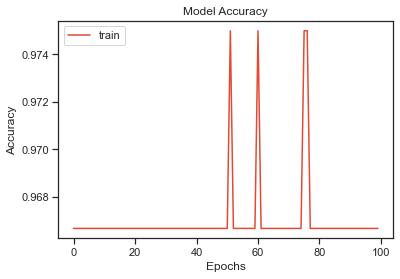

In [84]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'],loc='upper left')
plt.show()

## The above plot is showing the training accuracy with respect to each epochs. 

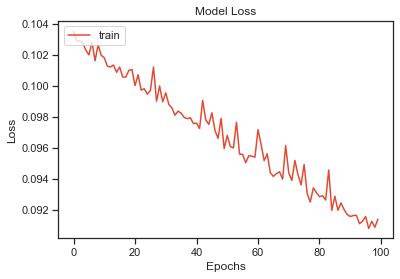

In [85]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'],loc='upper left')
plt.show()

### The above plot is showing the training loss with each epochs,these polts are showing the decipting changes in loss and accuracy at each epoch.  

In [87]:
hist = model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_test,Y_test))
hist

Epoch 1/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0908 - accuracy: 0.9667 - val_loss: 0.0758 - val_accuracy: 1.0000
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.0909 - accuracy: 0.9667 - val_loss: 0.0750 - val_accuracy: 1.0000
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 0.0903 - accuracy: 0.9667 - val_loss: 0.0757 - val_accuracy: 1.0000
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 0.0911 - accuracy: 0.9667 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.0900 - accuracy: 0.9667 - val_loss: 0.0751 - val_accuracy: 1.0000
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 0.0760 - val_accuracy: 1.0000
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0901 - accuracy: 0.9667 - val_loss: 0.0741 - val_accuracy: 1.0000
Epoch

12/12 [==============================] - 0s 13ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 0.0668 - val_accuracy: 1.0000
Epoch 59/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 60/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0861 - accuracy: 0.9667 - val_loss: 0.0688 - val_accuracy: 1.0000
Epoch 61/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0854 - accuracy: 0.9667 - val_loss: 0.0684 - val_accuracy: 1.0000
Epoch 62/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0855 - accuracy: 0.9667 - val_loss: 0.0665 - val_accuracy: 1.0000
Epoch 63/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0849 - accuracy: 0.9667 - val_loss: 0.0669 - val_accuracy: 1.0000
Epoch 64/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0847 - accuracy: 0.9667 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 65/100

In [95]:
hist.history

{'loss': [0.09082483500242233,
  0.09085774421691895,
  0.09033314883708954,
  0.09108562767505646,
  0.08999228477478027,
  0.09022548794746399,
  0.09011325985193253,
  0.0896979421377182,
  0.09016314893960953,
  0.09025295823812485,
  0.08973567187786102,
  0.08937393873929977,
  0.0896548256278038,
  0.089472196996212,
  0.08985711634159088,
  0.08908138424158096,
  0.08929088711738586,
  0.08965449780225754,
  0.08858642727136612,
  0.08943677693605423,
  0.08955452591180801,
  0.08996834605932236,
  0.0894363597035408,
  0.08827134966850281,
  0.08875461667776108,
  0.08806812763214111,
  0.08786030113697052,
  0.08787404745817184,
  0.08843672275543213,
  0.08777002990245819,
  0.08771125227212906,
  0.08736077696084976,
  0.08733773231506348,
  0.0882645696401596,
  0.08861469477415085,
  0.08778359740972519,
  0.08716285228729248,
  0.08836763352155685,
  0.08731981366872787,
  0.08700576424598694,
  0.08776248246431351,
  0.08702661842107773,
  0.08656471222639084,
  0.08667

## Plot of training vs test loss

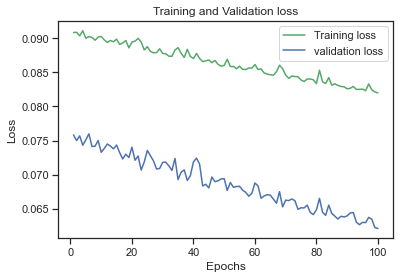

In [96]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The above snippet plots the graph of the training loss vs validation loss over the number of epochs.

## Plot of training vs test accuracy 

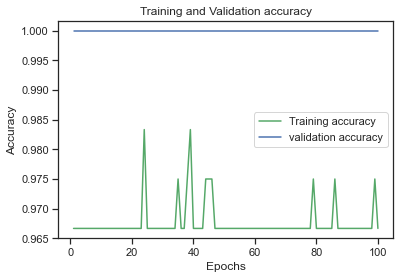

In [97]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### The following snippet plots the graph of training accuracy vs. validation accuracy over the number of epochs.

In [98]:
# Evalute the model
scores = model.evaluate(X_test,Y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 4s 4s/step - loss: 0.0621 - accuracy: 1.0000

Accuracy: 100.00%


#### An accuracy of 100% is achieved in this dataset.It can be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.

In [99]:
Y_pred = model.predict(X_test)

In [100]:
X_test[1,1], Y_pred[1]

(2.2, array([4.5245692e-05, 9.9200845e-01, 7.9462146e-03], dtype=float32))

In [101]:
Y_pred_class = np.argmax(Y_pred[1])
print(Y_pred_class)

1


In [102]:
#accuracy of the predicted values 
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 
print(classification_report(Y_test_class,Y_pred_class))
print(confusion_matrix(Y_test_class,Y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


#### The confusion confirms that the data which is in the test set all are classified correctly with 100% precision ,recall and F1-score 